In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score,confusion_matrix,classification_report,recall_score,f1_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
raw_df = pd.read_csv('Titanic.csv')
raw_df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [3]:
# check for missing values and drop rows with missing values
raw_df.info()
raw_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [4]:
raw_df.describe()
raw_df.isna().sum()
raw_df.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [5]:
# # convert to numerical columns
raw_df['sex'] = raw_df['sex'].map({'female':0,'male':1})
raw_df['class'] = raw_df['class'].map({'Third':1,'First':3,'Second':2}).astype(int)
raw_df['who'] = raw_df['who'].map({'man':3,'woman':2,'child':1}).astype(int)
raw_df['embarked'] = raw_df['embarked'].map({'S': 1,'C':2,'Q':3,}).astype(int)

In [6]:
# feature selections
features = raw_df.drop('survived',axis=1)
target = raw_df['survived']

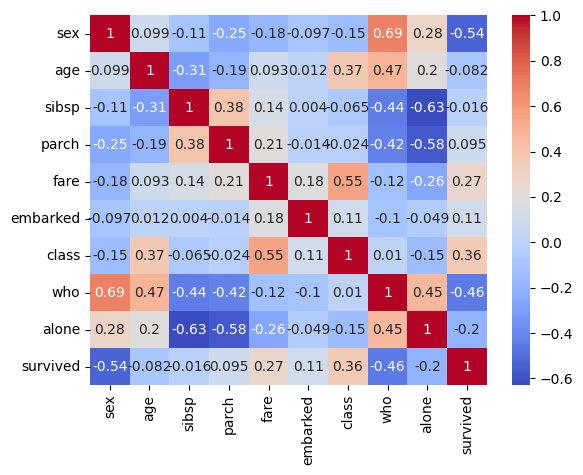

In [7]:
# plot the correlation of the features
sns.heatmap(raw_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data
X_test_scaled = scaler.transform(X_test)


In [10]:

# Train a classifier
clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(X_train_scaled, y_train)
# Make predictions
y_pred = clf.predict(X_test_scaled)

In [11]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print detailed classification report
report = classification_report(y_test, y_pred)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.78
Precision: 0.78
Recall: 0.71
F1 Score: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        80
           1       0.78      0.71      0.74        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143

Confusion Matrix:
 [[67 13]
 [18 45]]
